### Sam Brayton
### April 2023
### Final Project - Milestone 2

###### import needed packages and the dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from palmerpenguins import load_penguins

###### Explore basic properties of the dataset

In [3]:
penguins = load_penguins()

In [4]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [5]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [6]:
penguins.shape

(344, 8)

In [7]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [8]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [9]:
penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [10]:
penguins.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
99,Adelie,Dream,43.2,18.5,192.0,4100.0,male,2008


In [11]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


###### There are 344 rows and 8 columns

# Milestone 3

### Investigate any NaN's that you find. Should these be replaced with another value? If so, what would be the best value? Should that record be deleted instead?

### Finds/displays rows containing null values

In [12]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [13]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [14]:
penguins['sex'].unique()

array(['male', 'female', nan], dtype=object)

### Display rows containing null values

In [15]:
# Finds/displays rows containing null values
penguins[penguins.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


#### Replace NaN's in the sex column with 'Unknown'

In [16]:
# Replace NaN's in the sex column with 'Unknown'
penguins['sex'] = penguins['sex'].fillna('Unknown')


#### Delete records that contain NaN's
#### Removed rows 3 and 271 because they were missing 5 out of the 8 columns were NaN 

In [17]:
# Delete records that contain NaN's
penguins = penguins.dropna()

# removed rows 3 and 271 because they were missing 5 out of the 8 columns were NaN 

#### Check to see that there are no more NaN's

In [18]:
penguins.isnull().sum()
# all NaN's have been replaced or removed 


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

### Check for outliers

<AxesSubplot:xlabel='variable', ylabel='value'>

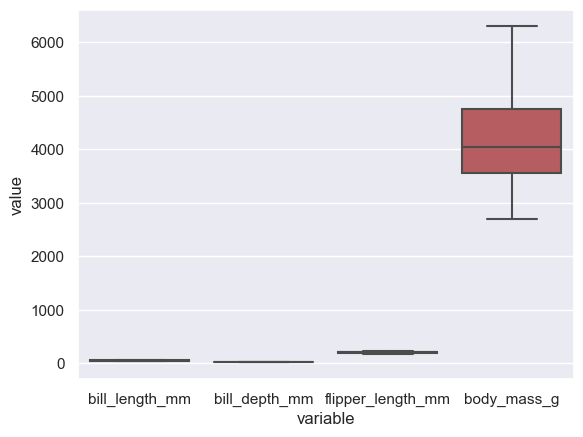

In [19]:
# Check for outliers
sns.boxplot(x="variable", y="value", data=pd.melt(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]))


#### No potential outliers

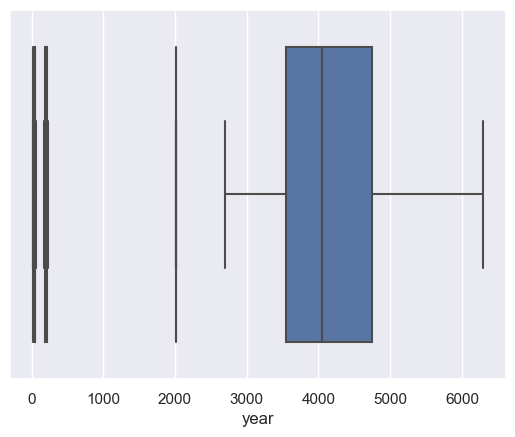

In [20]:
for col in penguins.select_dtypes(include='number').columns:
    sns.boxplot(x=penguins[col])

##### no potential outliers 

In [170]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,0.054545
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,-0.060354
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.169675
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.042209
year,0.054545,-0.060354,0.169675,0.042209,1.000000


# Milestone 4

### How many of each species are there? on each island? for each gender?

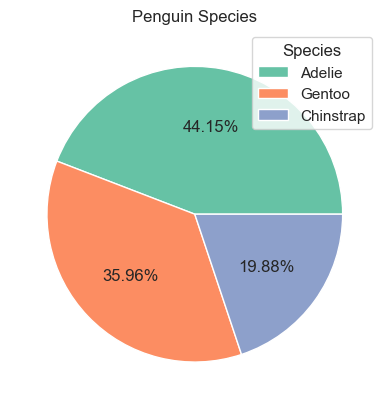

In [197]:
sns.set_palette("Set2")

plt.pie(penguins.species.value_counts(),autopct="%.2f%%")
plt.title("Penguin Species")
plt.legend(title="Species",labels=['Adelie','Gentoo','Chinstrap'],loc="upper right")

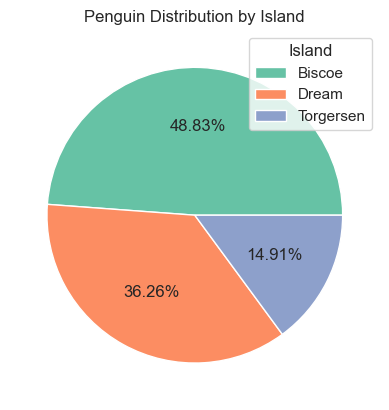

In [198]:
plt.pie(penguins.island.value_counts(),autopct="%.2f%%")
plt.title("Penguin Distribution by Island")
plt.legend(title="Island",labels=['Biscoe','Dream','Torgersen'],loc="upper right")

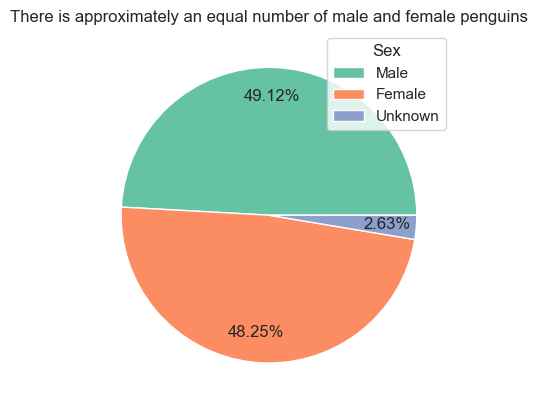

In [199]:
plt.pie(penguins.sex.value_counts(),autopct="%.2f%%",pctdistance=.8)
plt.title("There is approximately an equal number of male and female penguins")
plt.legend(title="Sex",labels=['Male','Female','Unknown'],loc="upper right")

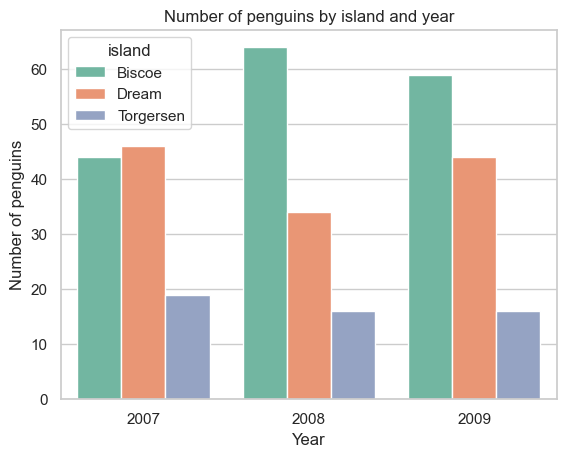

In [200]:
count_by_island_year = penguins.groupby(['island', 'year'])['species'].count().reset_index()

# Create a barplot to visualize the number of penguins by year and island
sns.barplot(x='year', y='species', hue='island', data=count_by_island_year)
plt.title('Number of penguins by island and year')
plt.ylabel('Number of penguins')
plt.xlabel('Year')
plt.show()

Text(0.5, 1.05, 'Number of Penguins by Species, Island, and Gender')

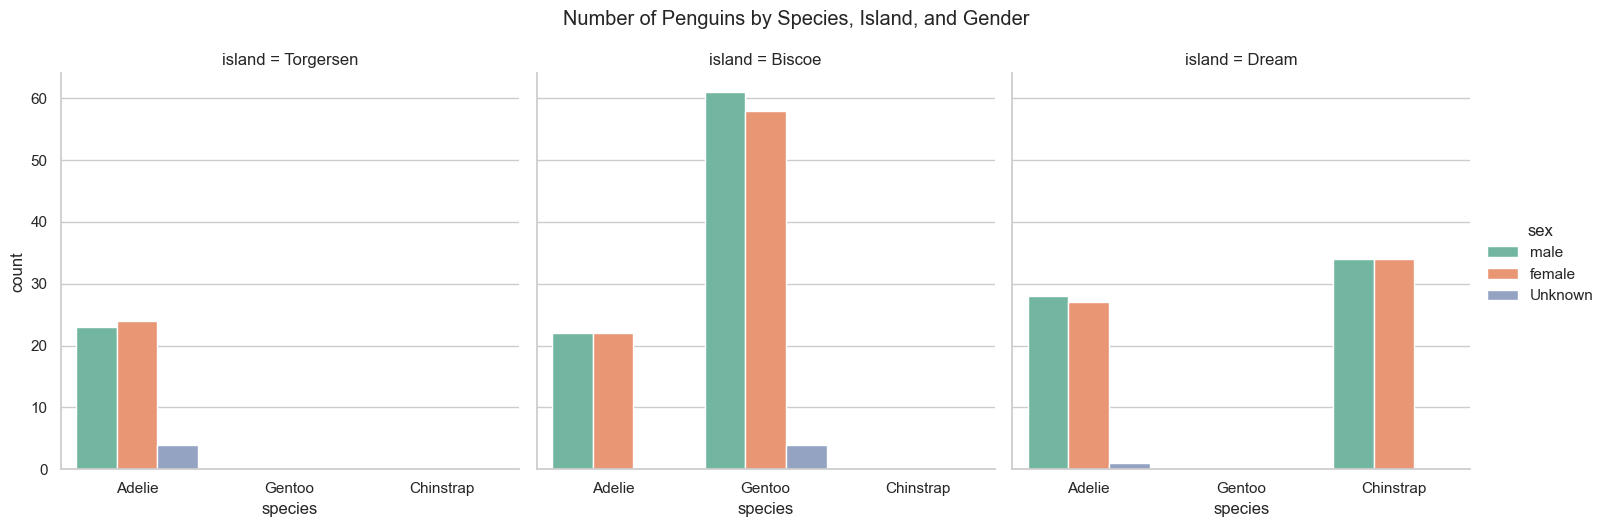

In [201]:
cat_plot = sns.catplot(x="species", hue="sex", col="island", data=penguins, kind="count")
cat_plot.fig.suptitle("Number of Penguins by Species, Island, and Gender", y=1.05)


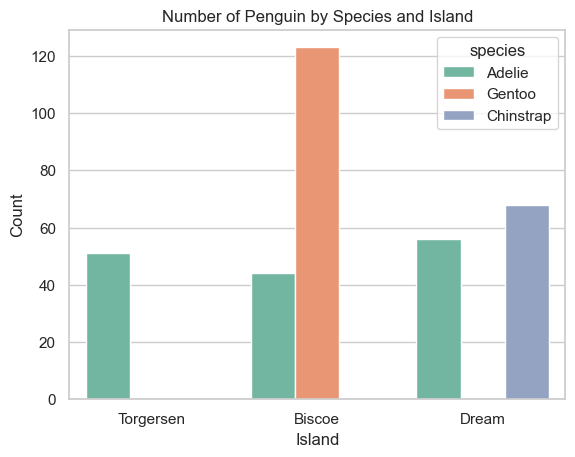

In [221]:
sns.countplot(x="island", hue="species", data=penguins)
plt.title("Number of Penguin by Species and Island")
plt.xlabel("Island")
plt.ylabel("Count")
plt.show()

### How does the body mass vary?

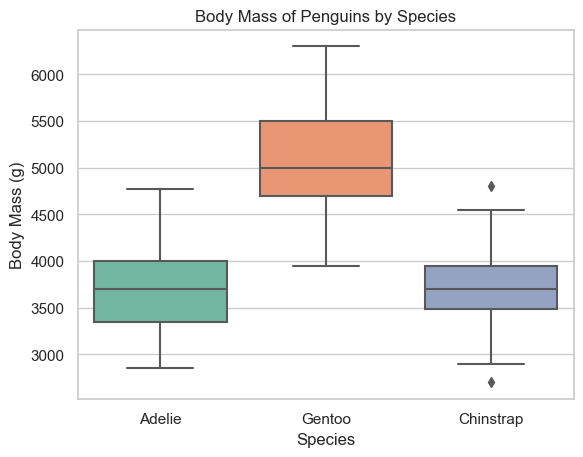

In [202]:
sns.boxplot(x="species", y="body_mass_g", data=penguins)
plt.title("Body Mass of Penguins by Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()


Text(0.5, 1.0, 'Body Mass for 3 Penguin Species by Sex')

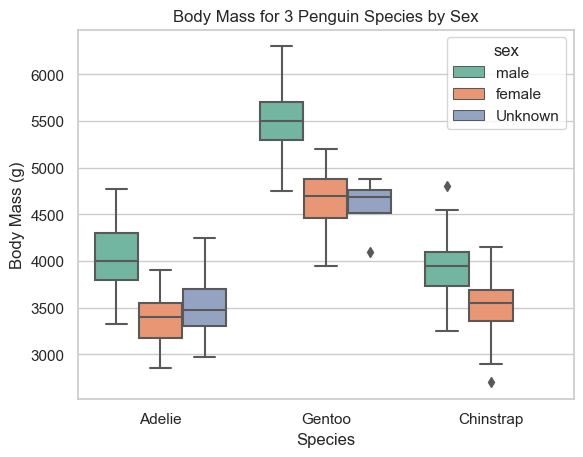

In [222]:
sns.boxplot(x = "species", y = "body_mass_g", data =penguins, hue = "sex")
plt.ylabel('Body Mass (g)')
plt.xlabel('Species')
plt.title("Body Mass for 3 Penguin Species by Sex")

Text(0.5, 1.0, 'Regardless of location, Gentoo penguins have the highest body mass.')

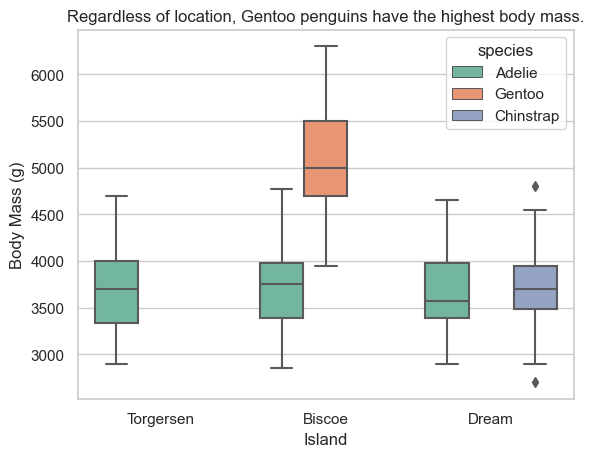

In [223]:
sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = penguins)
plt.xlabel('Island')
plt.ylabel('Body Mass (g)')
plt.title("Regardless of location, Gentoo penguins have the highest body mass.")


### What is the relationship between bill length and bill depth in penguins?

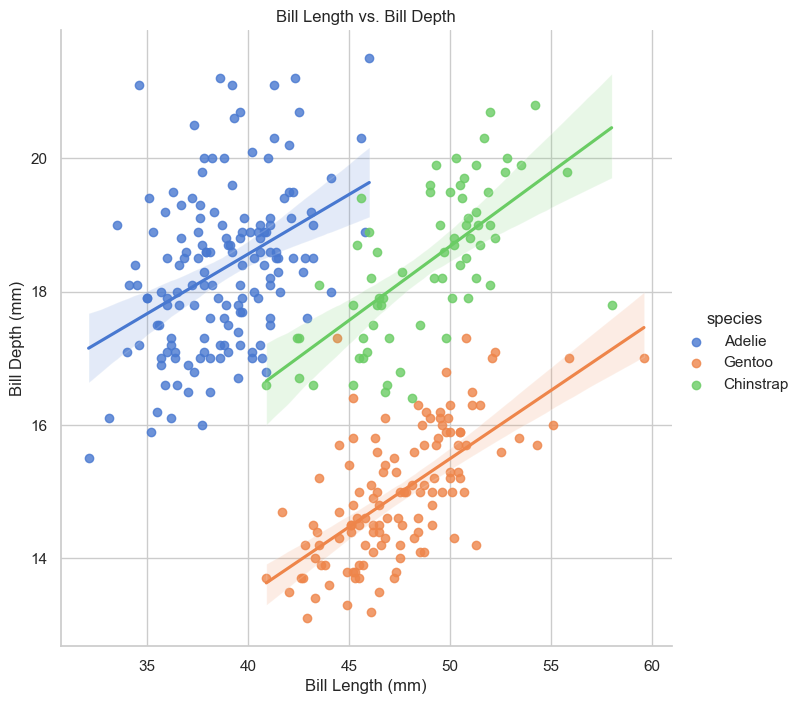

In [208]:
body_flip = sns.lmplot(x="bill_length_mm",
               y="bill_depth_mm",
               hue="species",
               height=7,
               data=penguins,
                       palette=("muted"))
                       #palette=['mediumseagreen','salmon','mediumpurple'])
plt.title("Bill Length vs. Bill Depth")
body_flip.set_xlabels('Bill Length (mm)')
body_flip.set_ylabels('Bill Depth (mm)')


### What is the relationship between flipper length and body mass in penguins?

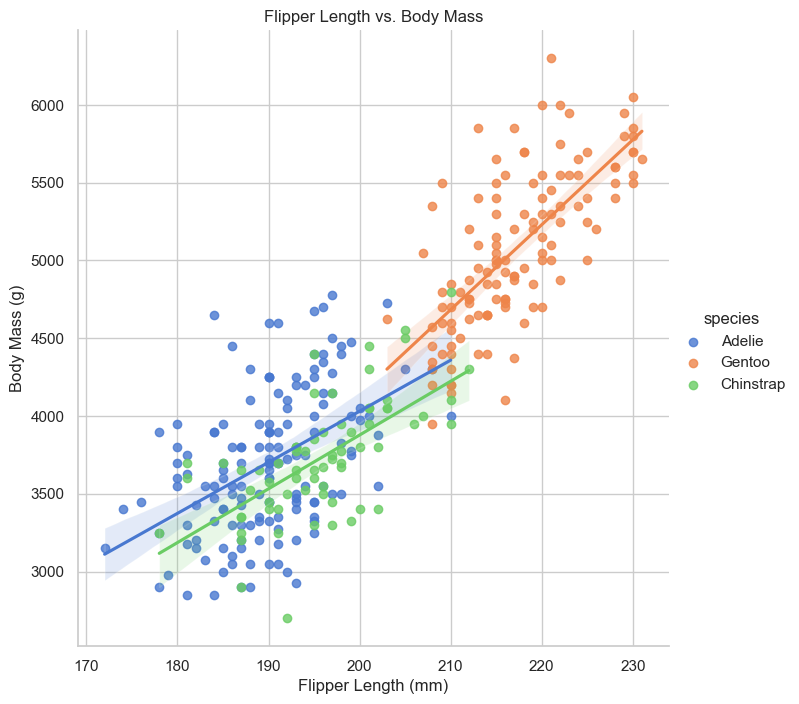

In [209]:
body_flip = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=penguins,
                       palette=("muted"))
                       #palette=['mediumseagreen','salmon','mediumpurple'])
plt.title("Flipper Length vs. Body Mass")
body_flip.set_xlabels('Flipper Length (mm)')
body_flip.set_ylabels('Body Mass (g)')



### Correlations?

<AxesSubplot:>

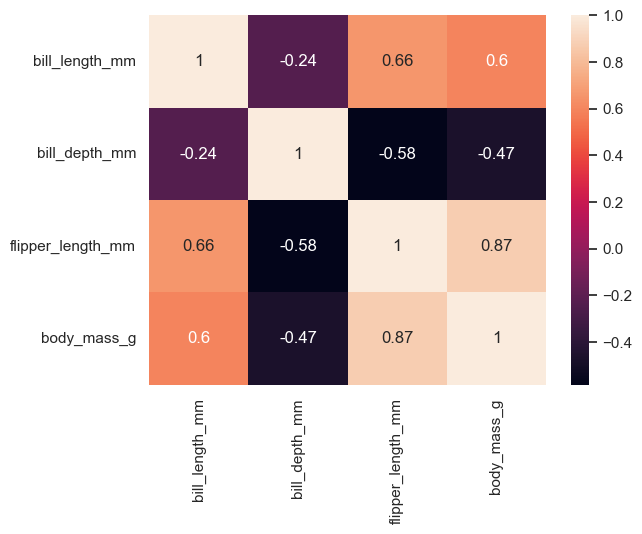

In [234]:
heats = penguins.drop(columns={'year'})

sns.heatmap(heats.corr(), annot = True)

# General visual analysis that was not used in readme.md:

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

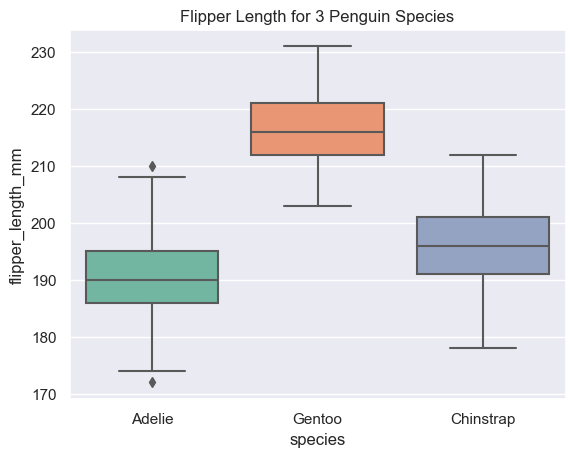

In [159]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =penguins)
plt.title("Flipper Length for 3 Penguin Species")

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

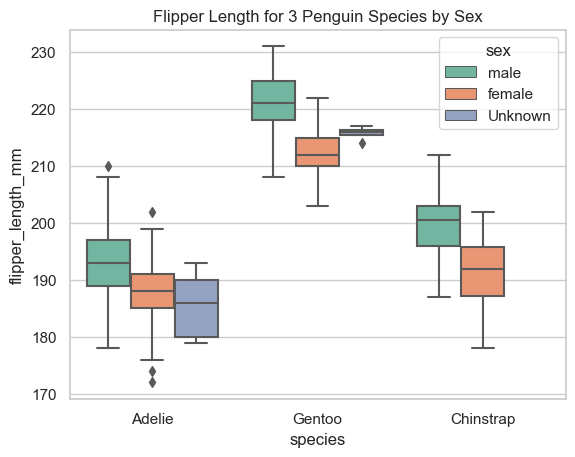

In [207]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =penguins, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex")

Text(0.5, 1.0, 'Flipper Length')

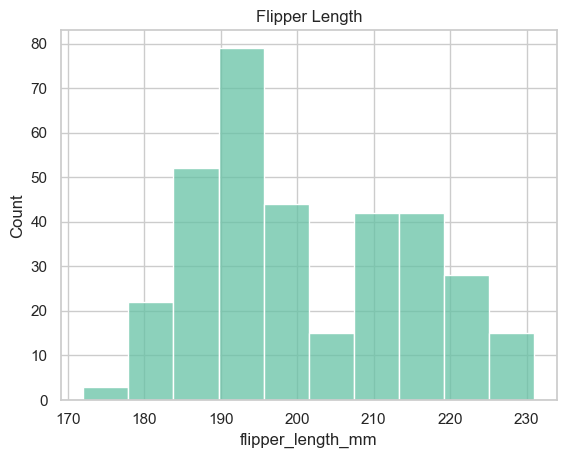

In [211]:
sns.histplot(x ="flipper_length_mm", data=penguins)
plt.title("Flipper Length")

Text(0.5, 1.0, 'Flipper Length')

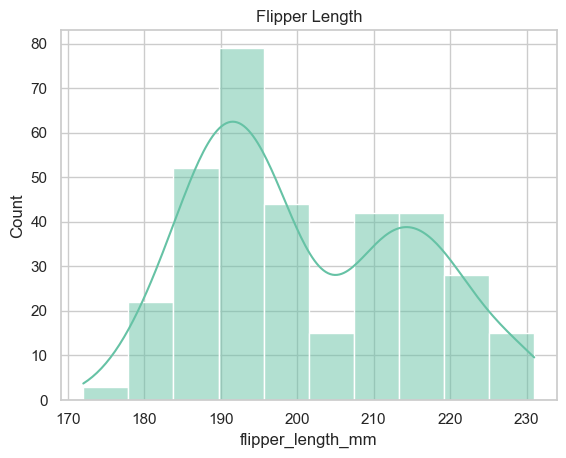

In [212]:

sns.histplot(x = "flipper_length_mm", data = penguins, kde = True)
plt.title("Flipper Length")

Text(0.5, 1.0, 'Flipper Length')

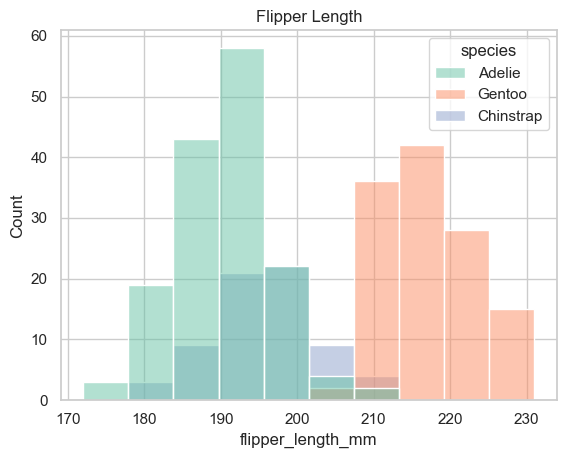

In [213]:
sns.histplot(x = "flipper_length_mm", data = penguins, hue = "species")
plt.title("Flipper Length")


Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

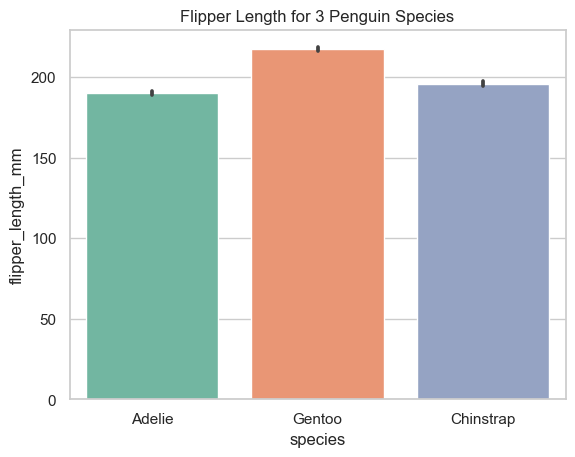

In [215]:
sns.barplot(x ="species", y="flipper_length_mm", data=penguins)
plt.title("Flipper Length for 3 Penguin Species")

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

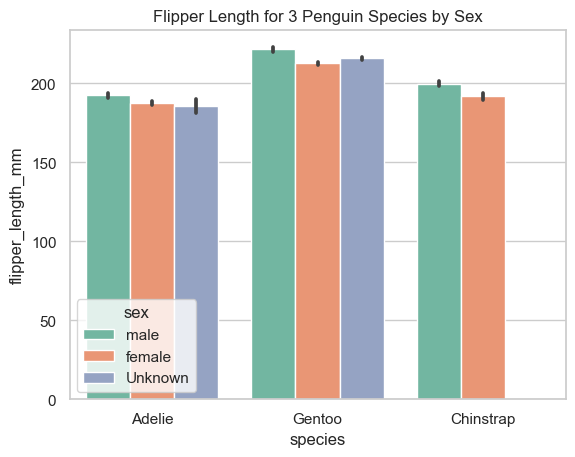

In [217]:
sns.barplot(x = "species", y = "flipper_length_mm", data =penguins, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex")

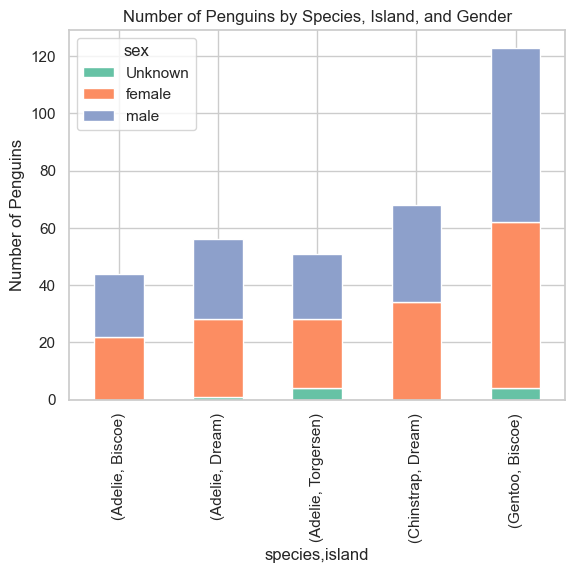

In [218]:
# Create a pivot table to calculate the number of penguins by species, island, and sex
penguins_pivot = penguins.pivot_table(index=['species', 'island'], columns='sex', aggfunc='size')

# Create the stacked bar plot
penguins_pivot.plot(kind='bar', stacked=True)
plt.ylabel('Number of Penguins')
plt.title('Number of Penguins by Species, Island, and Gender')
plt.show()


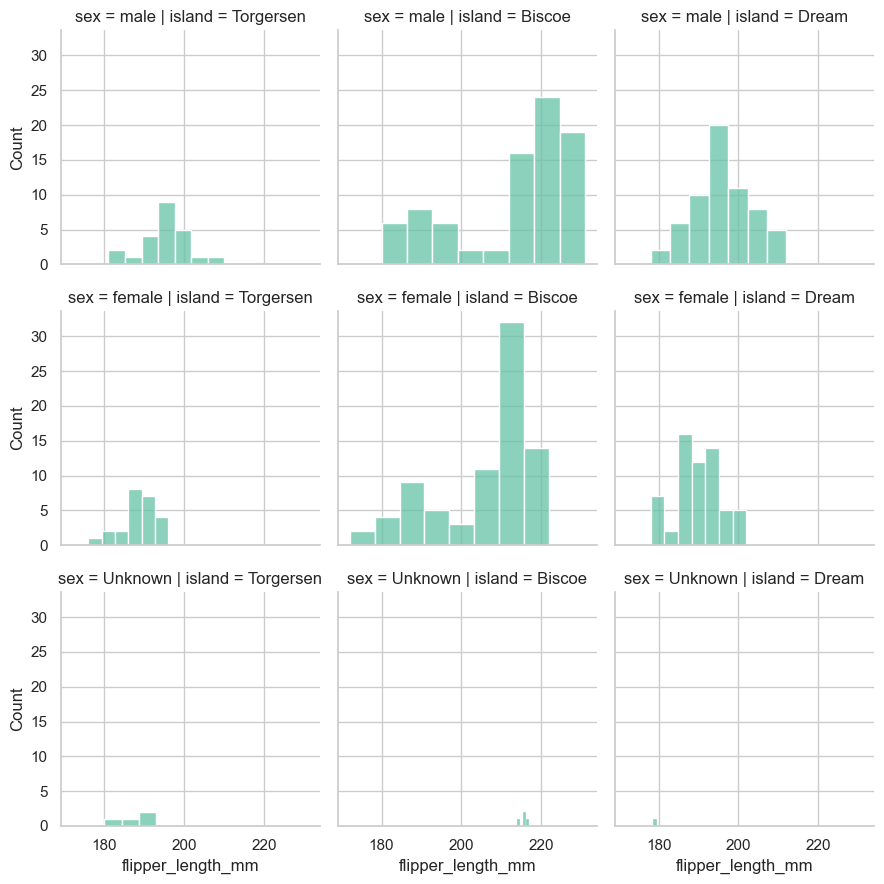

In [219]:
sns.FacetGrid(penguins, col="island", row="sex").map(sns.histplot, "flipper_length_mm")

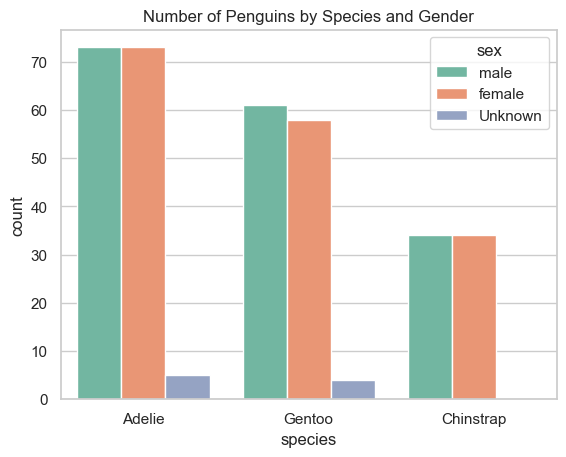

In [220]:
sns.countplot(x='species', hue='sex', data=penguins)
plt.title('Number of Penguins by Species and Gender')
plt.show()

<AxesSubplot:>

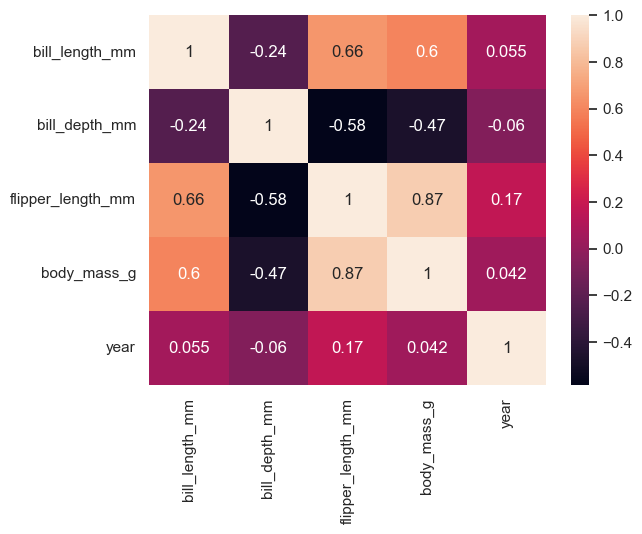

In [227]:
sns.heatmap(penguins.corr(), annot = True)